In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]

---------------------------------
Python interpreter: /home/imarevic/Documents/teaching/SRH/content/statistik/statistik-env/bin/python3


# Die F-Verteilung

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f

Die Snedecor-$F$-Verteilung oder die Fisher-Snedecor-Verteilung (nach <a href="https://de.wikipedia.org/wiki/Ronald_Aylmer_Fisher">Sir Ronald A. Fisher</a> und <a href="https://de.wikipedia.org/wiki/George_W._Snedecor">George W. Snedecor</a>) oder kurz die **$F$-Verteilung** ist eine kontinuierliche Wahrscheinlichkeitsverteilung mit dem Bereich $[0 \ $,$ \ +\infty[$, abhängig von zwei Parametern, die mit $v_1,v_2$ bezeichnet werden ({cite:p}`fahrmeirstatistik` s.281, {cite:p}`Scheid2021` s.179). In statistischen Anwendungen sind $v_1,v_2$
positive ganze Zahlen.

Seien $Y_1$ und $Y_2$ seien zwei unabhängige Zufallsvariablen, die **Chi-Quadrat**-verteilt sind, mit $v_1$ bzw. $v_2$ Freiheitsgraden. Dann wird die Verteilung des Verhältnisses ($Z$)

$$Z = \frac{Y_1/v_1}{Y_2/v_2}$$

als $F$-Verteilung mit $v_1$ und $v_2$ Freiheitsgraden bezeichnet. Die $F$-Verteilung wird häufig auch als *Verteilung des Varianzverhältnisses* bezeichnet ({cite:p}`fahrmeirstatistik` s.281).

Eine $F$-Verteilung hat zwei Zahlen von Freiheitsgraden, $v_1$ und $v_2$, die ihre Form bestimmen. Die erste Zahl der Freiheitsgrade, $v_1$, wird als die **Freiheitsgrade des Zählers** und die zweite, $v_2$, als die **Freiheitsgrade des Nenners** bezeichnet.

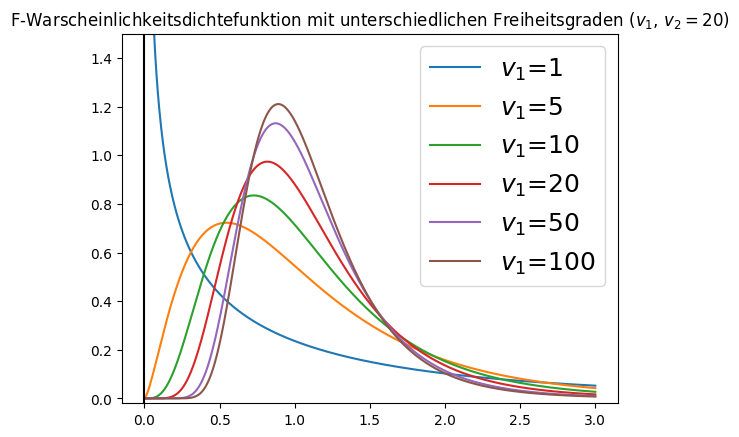

In [3]:
from scipy.stats import f
import numpy as np
import matplotlib.pyplot as plt

v1 = [1, 5, 10, 20, 50, 100]
v2 = 20
x = np.linspace(0, 3, 1000)
fig, ax = plt.subplots()
for _df in v1:
    ax.plot(x, f.pdf(x, dfn=_df, dfd=v2), label=f"$v_1$={_df}")
ax.set_title(
    "F-Warscheinlichkeitsdichtefunktion mit unterschiedlichen Freiheitsgraden ($v_1$, $v_2 =20$)"
)
ax.legend(fontsize=18)
ax.set_ylim(-0.02, 1.5)
ax.axvline(0, color="k")

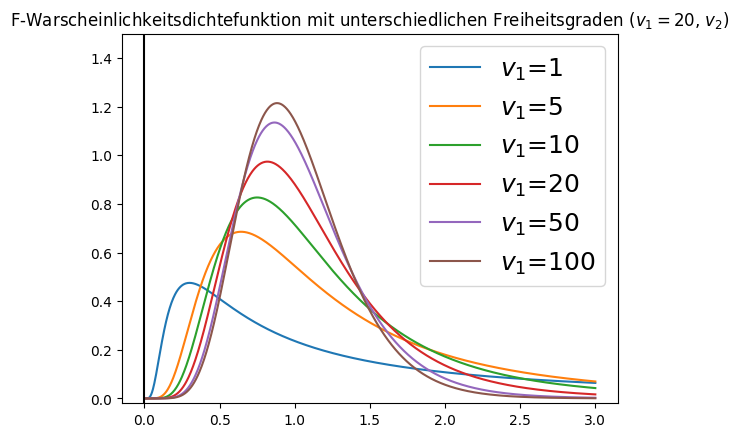

In [4]:
from scipy.stats import f
import numpy as np
import matplotlib.pyplot as plt

v1 = 20
v2 = [1, 5, 10, 20, 50, 100]

x = np.linspace(0, 3, 1000)
fig, ax = plt.subplots()
for _df in v2:
    ax.plot(x, f.pdf(x, dfn=v1, dfd=_df), label=f"$v_1$={_df}")
ax.set_title(
    "F-Warscheinlichkeitsdichtefunktion mit unterschiedlichen Freiheitsgraden ($v_1=20$, $v_2$)"
)
ax.legend(fontsize=18)
ax.set_ylim(-0.02, 1.5)
ax.axvline(0, color="k")

**Grundlegende Eigenschaften von F-Kurven**

- Die Gesamtfläche unter einer $F$-Kurve ist gleich $1$.
-Eine $F$-Kurve beginnt bei $0$ auf der horizontalen Achse und erstreckt sich unendlich weit nach rechts, wobei sie sich der horizontalen Achse nähert, diese aber nie berührt.
- Eine $F$-Kurve ist rechtsschief.

## Die F-Verteilung in Python
----------------------------------------

Die wichtigsten Funktionen zur Interaktion mit der $F$-Verteilung sind `f.pdf()`, `f.cdf()`, `f.ppf()`, `f.rvs()`. Die Funktion `f.pdf`() liefert die Dichte, die Funktion `f.cdf()` die Verteilungsfunktion, die Funktion `f.ppf()` die Quantilfunktion und die Funktion `f.rvs()` erzeugt Zufallsabweichungen.

Wir verwenden die Funktion `f.pdf()`, um die Dichte bei einem Wert von $1,2$ einer $F$-Kurve mit $v_1=10$ und $v_2=20$.

In [5]:
f.pdf(1.2, 10, 20)

np.float64(0.5626124566227062)

Wir verwenden `f.cdf()`, um die Fläche unter der Kurve für das Intervall $[0 \ $,$ \ 1,5]$ und das Intervall $[1,5 \ $,$ \ +\infty[$ einer F-Kurve mit $v_1=10$ und $v_2=20$ zu berechnen. Weiter fragen wir Python, ob die Summe der Intervalle $[0 \ $,$ \ 1,5]$ und $[1,5 \ $,$ \ +\infty[$ den Wert $1$ ergibt.

In [6]:
f_cdf1 = f.cdf(1.5, 10, 20)
f_cdf1

np.float64(0.7890535374813874)

In [7]:
f_cdf2 = 1 - f.cdf(1.5, 10, 20)
f_cdf2

np.float64(0.2109464625186126)

In [8]:
f_cdf1 + f_cdf2

np.float64(1.0)

Wir verwenden `f.ppf()`, um das Quantil für eine bestimmte Fläche (= Wahrscheinlichkeit) unter der Kurve für eine $F$-Kurve mit $v_1=10$ und $v_2=20$ zu berechnen, die $q=0,25,0,5,0,75$ und $0,999$ entspricht.

In [9]:
q = [0.25, 0.5, 0.75, 0.999]
f.ppf(q, 10, 20)

array([0.65639363, 0.96626389, 1.39948744, 5.07524621])

Wir verwenden die Funktion `f.rvs()`, um $100.000$ Zufallswerte aus der $F$-Verteilung mit $v_1=10$ und $v_2=20$ zu erzeugen. Anschließend zeichnen wir ein Histogramm und vergleichen es mit der Wahrscheinlichkeitsdichtefunktion der $F$-Verteilung mit $v_1=10$ und $v_2=20$ (orange Linie).

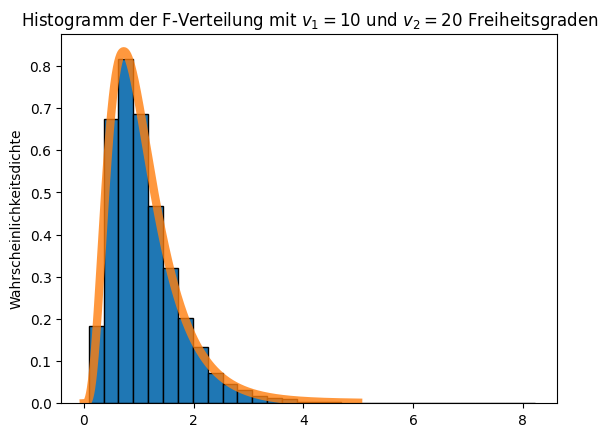

In [10]:
# Erzeuge Chi^2 Werte
f_rvs = f.rvs(10, 20, size=10000)

# Erzeuge x-werte
x = np.linspace(0, 5, num=1000)

# Plotte t-Verteilung
fig, ax = plt.subplots()
# plt.xlim(0,4.5)

ax.set_title("Histogramm der F-Verteilung mit $v_1=10$ und $v_2=20$ Freiheitsgraden")
ax.set_ylabel("Wahrscheinlichkeitsdichte")
ax.hist(f_rvs, bins=30, edgecolor="k", density=True)
ax.plot(x, f.pdf(x, 10, 20), linewidth=6, alpha=0.8)